## MNIST Random Forest

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix

In [16]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [17]:
digits = train.drop(['label'], 1).values
digits = digits / 255.
label = train['label'].values

X = digits
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

/var/folders/kr/f0qmqqxs5p19_gxt95ch4jn00000gn/T/ipykernel_53665/1816080881.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  digits = train.drop(['label'], 1).values


In [18]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [19]:
y_pred = model.predict(X_test)
rf_acc = accuracy_score(y_test, y_pred)

print("Model accuracy: {0:.3f}%".format(rf_acc * 100))

Model accuracy: 94.238%


In [20]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([408, 471, 420, 506, 397, 339, 402, 438, 403, 416]))

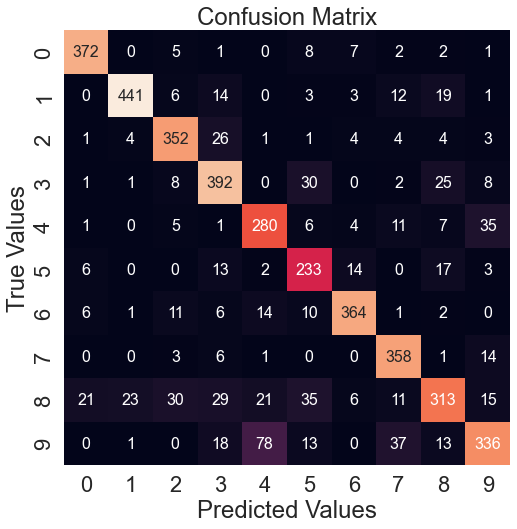

0.8192857142857143

In [21]:
mat = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(8,8))

sns.set(font_scale=2)
sns.heatmap(mat.T, annot=True, cbar = False, annot_kws={'size': 16}, fmt='.0f')
    
plt.title("Confusion Matrix")
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

accuracy_score(y_test, y_pred)